In [3]:
import pandas as pd
import os
os.chdir('../')

In [4]:
df = pd.read_csv('data/processed/processed_data.csv')
df.head()

,text,label
0,washington reuters the head of a conservative...,1
1,washington reuters transgender people will be...,1
2,washington reuters the special counsel invest...,1
3,washington reuters trump campaign adviser geo...,1
4,seattlewashington reuters president donald tr...,1


In [8]:
def check_data(df):
    print('Missing values:\n', df.isnull().sum())
    print('Duplicated rows', df.duplicated().sum())
    df.drop_duplicates(inplace=True)
    df.info()

check_data(df)


Missing values:
 text     0
label    0
dtype: int64
Duplicated rows 6042
<class 'pandas.core.frame.DataFrame'>
Index: 38647 entries, 0 to 43910
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    38647 non-null  object
 1   label   38647 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 905.8+ KB


<Axes: ylabel='count'>

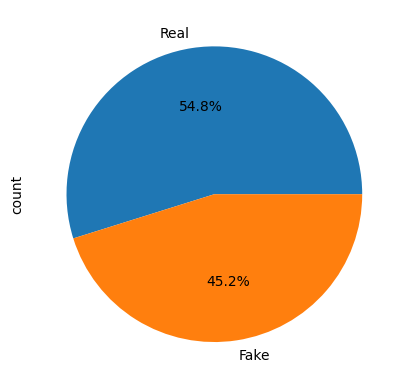

In [12]:
df['label'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Real', 'Fake'])

In [13]:
df['text'][0]

'washington reuters  the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in  in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense discretionary spending on programs that support education scientific research infrastr

 Here I've cleaned the data before converting into a csv file.